# Desafio 4

Neste desafio, vamos praticar um pouco sobre testes de hipóteses. Utilizaremos o _data set_ [2016 Olympics in Rio de Janeiro](https://www.kaggle.com/rio2016/olympic-games/), que contém dados sobre os atletas das Olimpíadas de 2016 no Rio de Janeiro.

Esse _data set_ conta com informações gerais sobre 11538 atletas como nome, nacionalidade, altura, peso e esporte praticado. Estaremos especialmente interessados nas variáveis numéricas altura (`height`) e peso (`weight`). As análises feitas aqui são parte de uma Análise Exploratória de Dados (EDA).

> Obs.: Por favor, não modifique o nome das funções de resposta.

## _Setup_ geral

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sct
import seaborn as sns
import statsmodels.api as sm 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from IPython.core.pylabtools import figsize


figsize(12, 8)

sns.set()

In [0]:
athletes = pd.read_csv("athletes.csv")

In [0]:
def get_sample(df, col_name, n=100, seed=42):
    """Get a sample from a column of a dataframe.
    
    It drops any numpy.nan entries before sampling. The sampling
    is performed without replacement.
    
    Example of numpydoc for those who haven't seen yet.
    
    Parameters
    ----------
    df : pandas.DataFrame
        Source dataframe.
    col_name : str
        Name of the column to be sampled.
    n : int
        Sample size. Default is 100.
    seed : int
        Random seed. Default is 42.
    
    Returns
    -------
    pandas.Series
        Sample of size n from dataframe's column.
    """
    np.random.seed(seed)
    
    random_idx = np.random.choice(df[col_name].dropna().index, size=n, replace=False)
    
    return df.loc[random_idx, col_name]

## Inicia sua análise a partir daqui

In [0]:
5/100

0.05

In [0]:
# Sua análise começa aqui.
tamanho_amostra = 3000
coluna = 'height'
amostra = get_sample(athletes, coluna, tamanho_amostra)
result = sct.shapiro(amostra)[1]
if result <= 0.05:
  print('São normalmente distribuidas')
else:
  print('Fudeu')

São normalmente distribuidas


## Questão 1

Considerando uma amostra de tamanho 3000 da coluna `height` obtida com a função `get_sample()`, execute o teste de normalidade de Shapiro-Wilk com a função `scipy.stats.shapiro()`. Podemos afirmar que as alturas são normalmente distribuídas com base nesse teste (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [0]:
def q1():
    # Retorne aqui o resultado da questão 1.
    alpha = 0.05
    sample_size = 3000
    column = 'height'
    sample = get_sample(athletes, column, sample_size)
    shapiro = sct.shapiro(amostra)[1]
    result = False
    if shapiro > alpha:
      result = True
    else:
      result = False
    return result

q1()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Plote o qq-plot para essa variável e a analise.
* Existe algum nível de significância razoável que nos dê outro resultado no teste? (Não faça isso na prática. Isso é chamado _p-value hacking_, e não é legal).

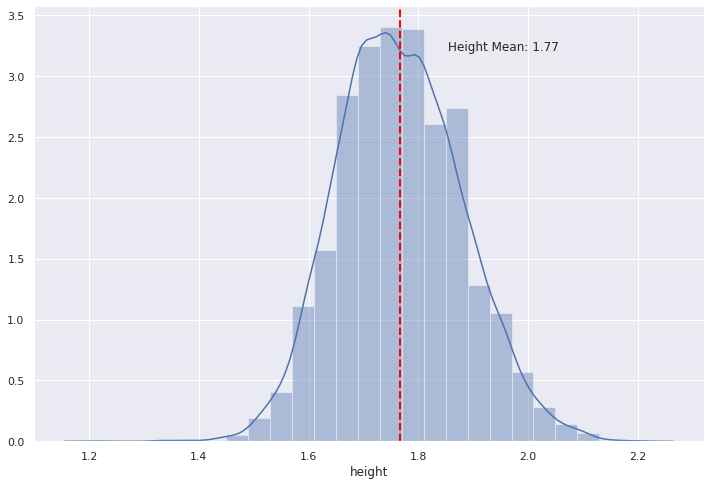

In [0]:
# Plote o histograma dessa variável (com, por exemplo, bins=25). A forma do gráfico e o resultado do teste são condizentes? Por que?
sns.distplot(athletes['height'], bins = 25);
height_mean = athletes['height'].mean()
plt.axvline(height_mean, color='red', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(height_mean*1.05, max_ylim*0.9, 'Height Mean: {:.2f}'.format(height_mean))
plt.show()

* Como queremos verificar que se trata de uam distribuição normal, é necessairo que a distribuição seja uniforme em relação a média da nossa varíavel em questão, como vemos no gráfico, a coluna 'Height' não apresenta uma distribuição normal. Vale notar que temos no lado esquerdo uma maior distribuição de valores, uma cauda mais longa do que comparada ao lado direito.

PS: Distribuições normais são bem dificeis de aparecer na prática.

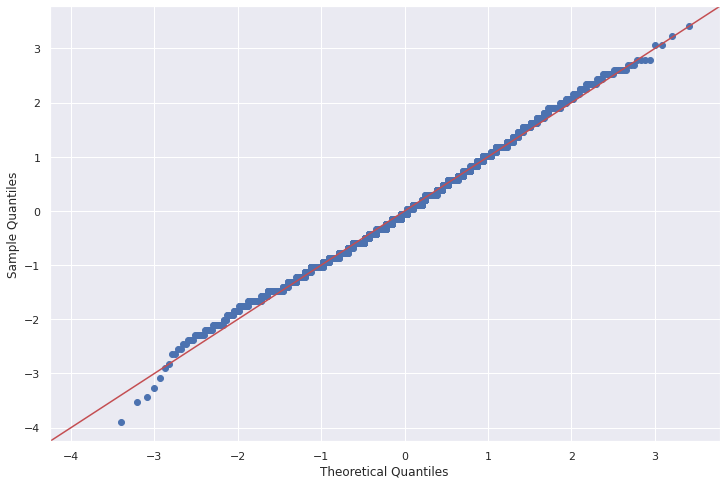

In [0]:
sample_size = 3000
column = 'height'
sample = get_sample(athletes, column, tamanho_amostra)
  
sm.qqplot(sample, fit= True, line ='45') 
plt.show() 

Utilizando o QQPLOT, podemos verificar que a distribuição segue normal durante boa parte, podemos ver que como falamos em cima, temos uma cauda maior na parte esquerda do gráfico o que fica evidente neste gráfico.

## Questão 2

Repita o mesmo procedimento acima, mas agora utilizando o teste de normalidade de Jarque-Bera através da função `scipy.stats.jarque_bera()`. Agora podemos afirmar que as alturas são normalmente distribuídas (ao nível de significância de 5%)? Responda com um boolean (`True` ou `False`).

In [0]:
tamanho_amostra = 3000
coluna = 'height'
amostra = get_sample(athletes, coluna, tamanho_amostra)
sct.jarque_bera(amostra)

(13.03363513594265, 0.001478366424594868)

In [0]:
def q2():
    alpha = 0.05
    sample_size = 3000
    column = 'height'
    sample = get_sample(athletes, column, sample_size)
    _, p_value = sct.jarque_bera(sample)
    result = False
    if p_value > 0.05:
      result = True
    return result

q2()

False

__Para refletir__:

* Esse resultado faz sentido?

In [0]:
sct.skew(sample), sct.kurtosis(sample)

(0.15974896040186146, -0.046799141975459424)

Faz total sentido, pois os números são proximos de zero e demonstram claramente que no lado esquerdo da nossa distribuição temos mais variaveis que desbalanceam nossa distribuição

## Questão 3

Considerando agora uma amostra de tamanho 3000 da coluna `weight` obtida com a função `get_sample()`. Faça o teste de normalidade de D'Agostino-Pearson utilizando a função `scipy.stats.normaltest()`. Podemos afirmar que os pesos vêm de uma distribuição normal ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [0]:
def q3():

  alpha = 0.05
  sample_size = 3000
  column = 'weight'
  sample = get_sample(athletes, column, sample_size)
  _, p_value = sct.normaltest(sample)
  result = False
  if p_value > alpha:
    result = True
  else:
    result = False
  return result

q3()

False

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Um _box plot_ também poderia ajudar a entender a resposta.

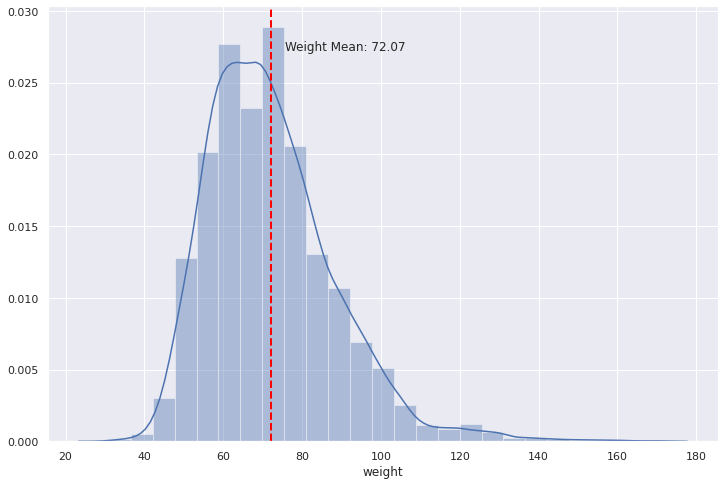

In [0]:
#Plote o histograma dessa variável (com, por exemplo, bins=25). A forma do gráfico e o resultado do teste são condizentes? Por que?
sns.distplot(athletes['weight'], bins = 25);
height_mean = athletes['weight'].mean()
plt.axvline(height_mean, color='red', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(height_mean*1.05, max_ylim*0.9, 'Weight Mean: {:.2f}'.format(height_mean))
plt.show()

Sim, pois como nosso **P-valor** é inferior ao nosso nível de significancai de 5%, nos podemos rejeitar esta hipótese de que a distribuição 'Weight' é normal, vale destacar que temos uma cauda muito superior do lado direito o que interfere na medida da distribuição, isso pode dar devido a diversos esportes que fazem com que atletas tenham um maior peso.

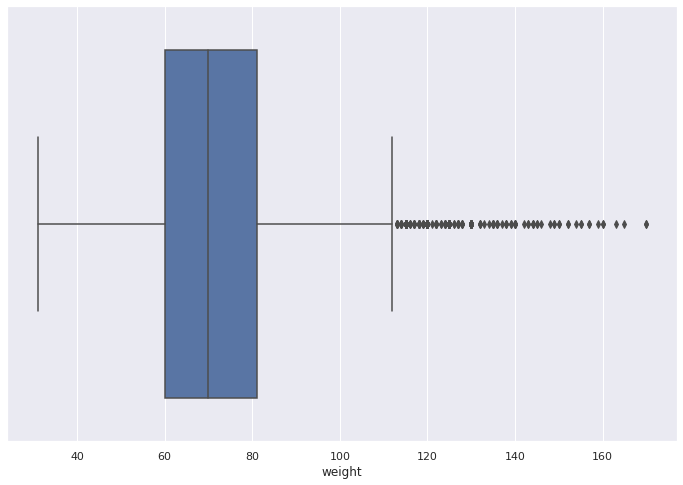

In [0]:
#Um box plot também poderia ajudar a entender a resposta.
sns.boxplot(athletes['weight'])

## Questão 4

Realize uma transformação logarítmica em na amostra de `weight` da questão 3 e repita o mesmo procedimento. Podemos afirmar a normalidade da variável transformada ao nível de significância de 5%? Responda com um boolean (`True` ou `False`).

In [0]:
def q4():
    # Retorne aqui o resultado da questão 4.
    alpha = 0.05
    sample_size = 3000
    column = 'weight'
    sample = get_sample(athletes, column, sample_size)
    log_transform_sample = np.log(sample)
    _, p_value = sct.normaltest(log_transform_sample)
    result = False
    if p_value > alpha:
      result = True
    else:
      result = False
    return result

q4()

True

__Para refletir__:

* Plote o histograma dessa variável (com, por exemplo, `bins=25`). A forma do gráfico e o resultado do teste são condizentes? Por que?
* Você esperava um resultado diferente agora?

> __Para as questão 5 6 e 7 a seguir considere todos testes efetuados ao nível de significância de 5%__.

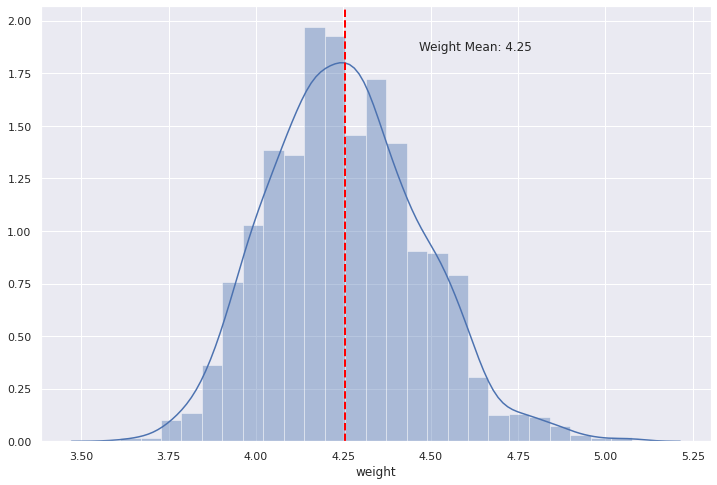

In [0]:
#Plote o histograma dessa variável (com, por exemplo, bins=25). A forma do gráfico e o resultado do teste são condizentes? Por que?
plt.figure(figsize = (12,8))
sample_size = 3000
column = 'weight'
sample = get_sample(athletes, column, sample_size)

log_transform_sample = np.log(sample)
weight_mean = log_transform_sample.mean()
sns.distplot(log_transform_sample, bins = 25);
plt.axvline(weight_mean, color='red', linestyle='dashed', linewidth=2)
min_ylim, max_ylim = plt.ylim()
plt.text(weight_mean*1.05, max_ylim*0.9, 'Weight Mean: {:.2f}'.format(weight_mean))
plt.show()

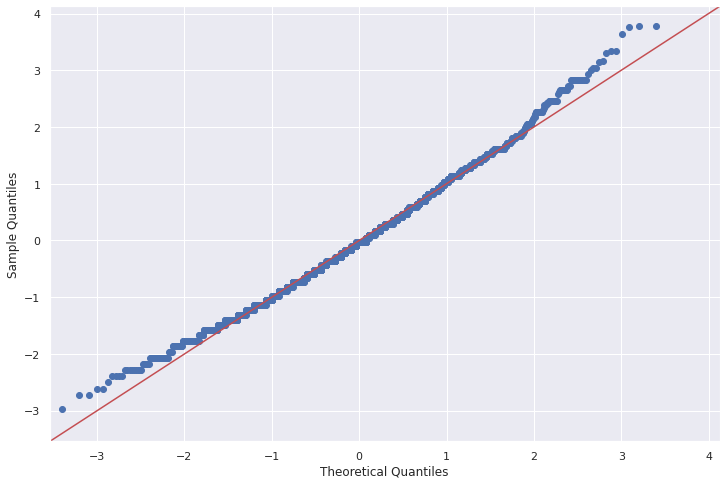

In [0]:
sm.qqplot(log_transform_sample, fit = True, line='45')
plt.show()

Você esperava um resultado diferente agora?

Sim, pois podemos verificar que temos uma distribuição com as caudas com valores mais distantes dos resto.
Ter afirmado que não podemos rejeitar a hipotese, que é uma distribuição normal utilizando logaritimo faz total sentido, pois quando realizamos esta transformações os valores não ficam com grandes amplitudes o que interferem no resultado final.

## Questão 5

Obtenha todos atletas brasileiros, norte-americanos e canadenses em `DataFrame`s chamados `bra`, `usa` e `can`,respectivamente. Realize um teste de hipóteses para comparação das médias das alturas (`height`) para amostras independentes e variâncias diferentes com a função `scipy.stats.ttest_ind()` entre `bra` e `usa`. Podemos afirmar que as médias são estatisticamente iguais? Responda com um boolean (`True` ou `False`).

In [0]:
def q5():
    # Retorne aqui o resultado da questão 5.
    alpha = 0.05
    #Countries
    bra = athletes[athletes['nationality'] == 'BRA']
    can = athletes[athletes['nationality'] == 'CAN']
    usa = athletes[athletes['nationality'] == 'USA']
    # Alturas
    bra_height = bra['height'].dropna()
    can_height = can['height'].dropna()
    usa_height = usa['height'].dropna()

    _ , p_value = sct.ttest_ind(bra_height, usa_height, equal_var = False)
    
    result = False
    if p_value > alpha:
      result = True      
    return result

q5()

0.0013080041830144061


False


## Questão 6

Repita o procedimento da questão 5, mas agora entre as alturas de `bra` e `can`. Podemos afimar agora que as médias são estatisticamente iguais? Reponda com um boolean (`True` ou `False`).

In [0]:
def q6():
    # Retorne aqui o resultado da questão 6.
    alpha = 0.05
    bra = athletes[athletes['nationality'] == 'BRA']
    can = athletes[athletes['nationality'] == 'CAN']

    bra_height = bra['height'].dropna()
    can_height = can['height'].dropna()

    _ , p_value = sct.ttest_ind(bra_height, can_height, equal_var = False)

    result = False
    if p_value > alpha:
      result = True      
    return result
q6()

True

## Questão 7

Repita o procedimento da questão 6, mas agora entre as alturas de `usa` e `can`. Qual o valor do p-valor retornado? Responda como um único escalar arredondado para oito casas decimais.

In [0]:
def q7():
    # Retorne aqui o resultado da questão 7.
    alpha = 0.05
    #Countries
    bra = athletes[athletes['nationality'] == 'BRA']
    can = athletes[athletes['nationality'] == 'CAN']
    usa = athletes[athletes['nationality'] == 'USA']
    # Alturas
    bra_height = bra['height'].dropna()
    can_height = can['height'].dropna()
    usa_height = usa['height'].dropna()

    _ , p_value = sct.ttest_ind(can_height, usa_height, equal_var = False)
    
    result = float(round(p_value, 8))
    return result
q7()

0.00046601


__Para refletir__:

* O resultado faz sentido?
* Você consegue interpretar esse p-valor?
* Você consegue chegar a esse valor de p-valor a partir da variável de estatística?

In [0]:
bra = athletes[athletes['nationality'] == 'BRA']
can = athletes[athletes['nationality'] == 'CAN']
usa = athletes[athletes['nationality'] == 'USA']
    # Alturas
bra_height = bra['height'].dropna()
can_height = can['height'].dropna()
usa_height = usa['height'].dropna()


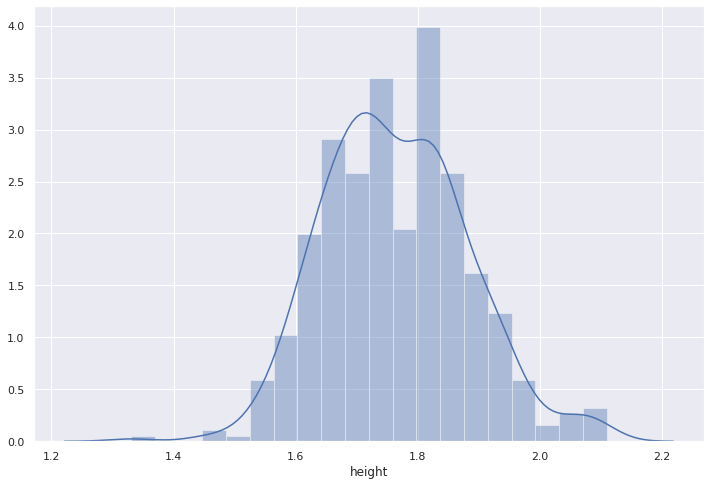

In [0]:
sns.distplot(bra_height)

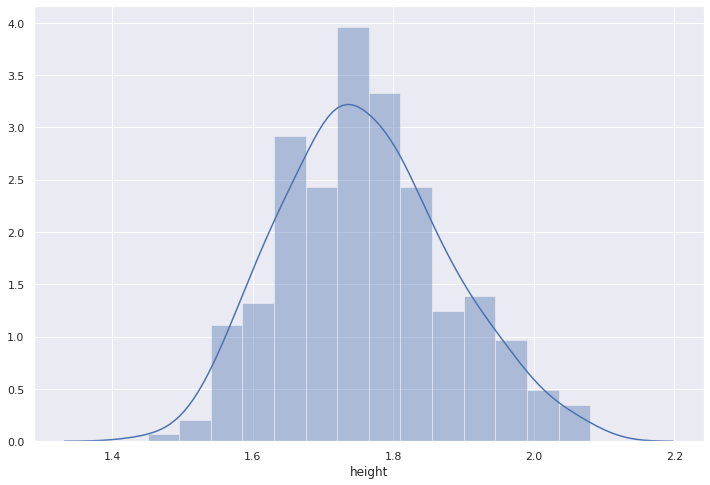

In [0]:
sns.distplot(can_height)

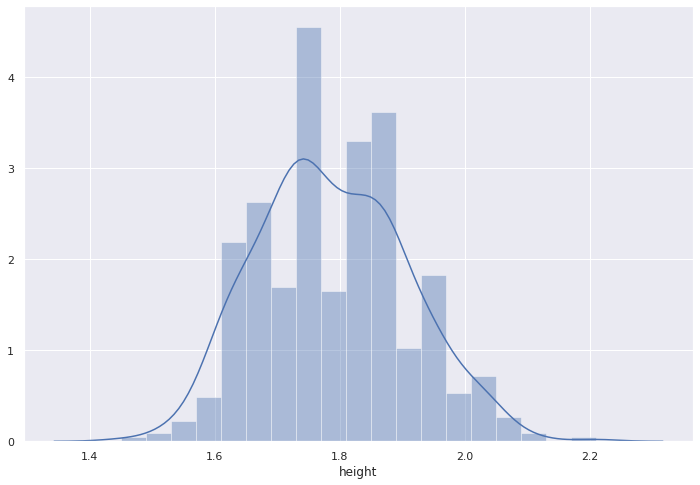

In [0]:
sns.distplot(usa_height)

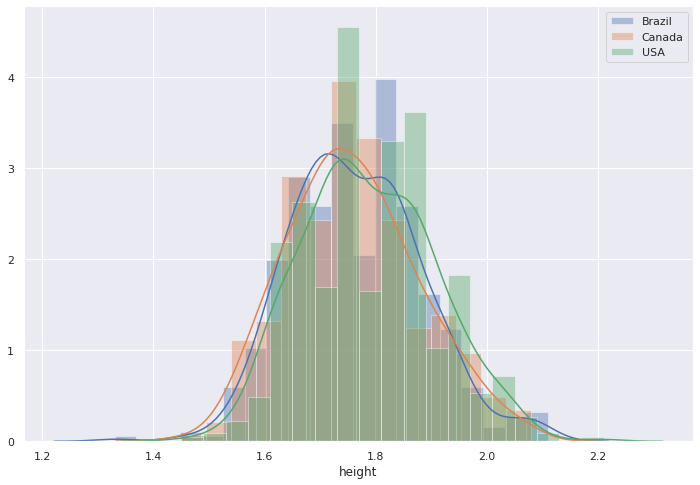

In [0]:
sns.distplot(bra_height, label = 'Brazil')
sns.distplot(can_height, label = 'Canada')
sns.distplot(usa_height, label = 'USA')
plt.legend()
plt.show()

O resultado faz sentido?
Sim, pois as distribuições entre os Estados Unidos e o Brasil possuem caracteristicas bem próximas, logo a Hipótese de que são estatisticamente semelhantes é verdadeira logo aceitamos esta hipótese.

Já na questão 6, temos distribuições bastante diferentes, as alturas dos atletas do Canada se assemelham a uma distribuição normal, enquanto a do Brasil não por isso rejeitamos esta hipótese que são semelhantes estatisticamente.

Você consegue interpretar esse p-valor?

Que no intervalo de confiança de 95%, a média se encontra na População.